# EDA and Preprocessing

In [ ]:
import pandas as pd
import tensorflow_hub as hub
import tensorflow as tf
import pandas as pd
from bs4 import BeautifulSoup,XMLParsedAsHTMLWarning
import warnings
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer,AutoModelForSequenceClassification,TrainingArguments,Trainer,DataCollatorWithPadding
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModel, TFBertModel, TFAutoModel
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
resume = pd.read_csv("Resume.csv")

In [ ]:
resume.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
resume.shape

(2484, 4)

In [ ]:
def cleanse(concat_text):
    concat_text = concat_text.lower()
    concat_text = re.sub(r'[^(a-zA-Z)\s]',' ', concat_text)
    concat_text = [word for word in concat_text.split() if word not in stopwords.words('english')]
    sentence = []
    for word in concat_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))
    return ' '.join(sentence)

In [ ]:
resume["Resume_str"].nunique()

2482

In [ ]:
resume.isnull().sum()

,0
ID,0
Resume_str,0
Resume_html,0
Category,0


In [ ]:
cols = ["ID", "Resume_html"]
resume = resume.drop(cols,axis=1)

In [ ]:
resume["Cleaned_text"] = resume["Resume_str"].apply(lambda x: cleanse(x))

In [ ]:
resume.head()

,Resume_str,Category,Cleaned_text
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator market associate hr administr...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versati...
2,HR DIRECTOR Summary Over 2...,HR,hr director summary years experience recruit p...
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicate drive dynamic y...
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlight hr skills hr depart...


In [ ]:
resume = resume.drop("Resume_str",axis=1)

In [ ]:
resume.head()

,Category,Cleaned_text
0,HR,hr administrator market associate hr administr...
1,HR,hr specialist us hr operations summary versati...
2,HR,hr director summary years experience recruit p...
3,HR,hr specialist summary dedicate drive dynamic y...
4,HR,hr manager skill highlight hr skills hr depart...


In [ ]:
import matplotlib.pyplot as plt

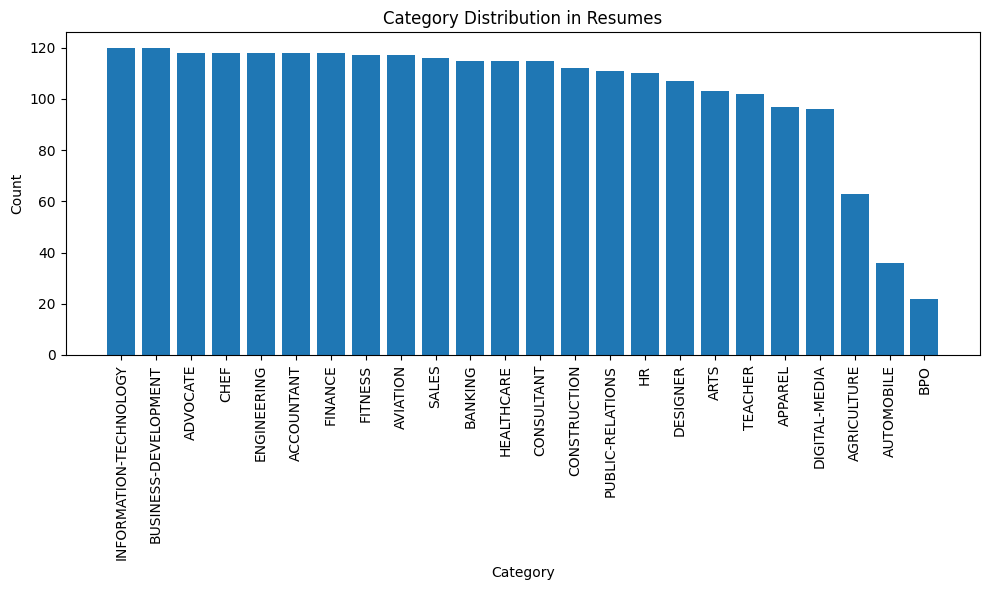

In [ ]:
category_counts = resume['Category'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution in Resumes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
%pip install datasets huggingface-hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
resume.to_csv("resume_cleaned.csv",index=False)

In [ ]:
df = pd.read_csv("resume_cleaned.csv")

In [ ]:
df["Category"].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      2484 non-null   object
 1   Cleaned_text  2483 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


# Model Initialization and training

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
id2label = {
    0: 'HR',
    1: 'DESIGNER',
    2: 'INFORMATION-TECHNOLOGY',
    3: 'TEACHER',
    4: 'ADVOCATE',
    5: 'BUSINESS-DEVELOPMENT',
    6: 'HEALTHCARE',
    7: 'FITNESS',
    8: 'AGRICULTURE',
    9: 'BPO',
    10: 'SALES',
    11: 'CONSULTANT',
    12: 'DIGITAL-MEDIA',
    13: 'AUTOMOBILE',
    14: 'CHEF',
    15: 'FINANCE',
    16: 'APPAREL',
    17: 'ENGINEERING',
    18: 'ACCOUNTANT',
    19: 'CONSTRUCTION',
    20: 'PUBLIC-RELATIONS',
    21: 'BANKING',
    22: 'ARTS',
    23: 'AVIATION'
}

label2id = {label: idx for idx, label in id2label.items()}

In [ ]:
print(df["Cleaned_text"].apply(type).value_counts())

Cleaned_text
<class 'str'>      2483
<class 'float'>       1
Name: count, dtype: int64


In [ ]:
df["Cleaned_text"] = df["Cleaned_text"].astype(str)

In [ ]:
print(df["Cleaned_text"].apply(type).value_counts())

Cleaned_text
<class 'str'>    2484
Name: count, dtype: int64


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased",num_labels=24,id2label=id2label,label2id=label2id)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
for name, param in model.base_model.named_parameters():
  param.requires_grad = True

In [ ]:
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
non_trainable_params = sum(p.numel() for p in model.parameters() if not p.requires_grad)

print(f"Trainable Parameters: {trainable_params}")
print(f"Non-Trainable Parameters: {non_trainable_params}")
print(f"Total Parameters: {trainable_params + non_trainable_params}")

Trainable Parameters: 66971928
Non-Trainable Parameters: 0
Total Parameters: 66971928


In [ ]:
import datasets

In [ ]:
def preprocess_texts(examples):
    tokens = tokenizer(
        examples["Cleaned_text"], truncation=True, padding="max_length"
    )
    tokens["labels"] = [label2id[label] for label in examples["Category"]]
    return tokens
dataset = datasets.Dataset.from_pandas(df)
tokenized_data = dataset.map(preprocess_texts, batched=True, remove_columns=["Category", "Cleaned_text"])


split_dataset = tokenized_data.train_test_split(test_size=0.2, seed=42)
tokenized_data = datasets.DatasetDict(split_dataset)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map:   0%|          | 0/2484 [00:00<?, ? examples/s]

In [ ]:
lr = 5e-5
batch_size = 32
num_epochs = 10

In [ ]:
import keras

In [ ]:
callbackss = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [ ]:
training_args = TrainingArguments(
    output_dir="distilbert-base-uncased-stackoverflow-prediction",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    logging_strategy="epoch",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

<ipython-input-59-9e3d4c5b8ae1>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,2.808300,2.030723,0.587525,0.539998,0.587525,0.507417
2,1.452400,0.959998,0.843058,0.834761,0.843058,0.831227
3,0.773300,0.680709,0.867203,0.857211,0.867203,0.857599
4,0.516900,0.598936,0.865191,0.863173,0.865191,0.860587
5,0.371200,0.606590,0.877264,0.874863,0.877264,0.871823
6,0.290900,0.581621,0.873239,0.870217,0.873239,0.870146
7,0.244600,0.597623,0.871227,0.870283,0.871227,0.868773
8,0.182400,0.608192,0.875252,0.871991,0.875252,0.871354
9,0.151300,0.607648,0.885312,0.877701,0.885312,0.879537
10,0.131000,0.610282,0.879276,0.872305,0.879276,0.874112


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

TrainOutput(global_step=630, training_loss=0.6922323015001085, metrics={'train_runtime': 1062.753, 'train_samples_per_second': 18.697, 'train_steps_per_second': 0.593, 'total_flos': 2633159896842240.0, 'train_loss': 0.6922323015001085, 'epoch': 10.0})

In [ ]:
model.save_pretrained("saved_distilbert_resume_model")
tokenizer.save_pretrained("saved_distilbert_resume_model")

('saved_distilbert_resume_model/tokenizer_config.json',
 'saved_distilbert_resume_model/special_tokens_map.json',
 'saved_distilbert_resume_model/vocab.txt',
 'saved_distilbert_resume_model/added_tokens.json',
 'saved_distilbert_resume_model/tokenizer.json')

In [ ]:
model.push_to_hub("notshivain1/distilbert-base-uncased-resume-category-pred", token = "")
tokenizer.push_to_hub("notshivain1/distilbert-base-uncased-resume-category-pred", token = "")

print("Model successfully uploaded to Hugging Face!")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

Model successfully uploaded to Hugging Face!


#Prediction

In [ ]:
model_name = "notshivain1/distilbert-base-uncased-resume-category-pred"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
import torch

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 9.4 MB/s eta 0:00:00


In [ ]:
import PyPDF2

def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text() + " "
    return text.strip()

In [ ]:
def predict_category_score(text, selected_category):
    inputs = tokenizer(text, truncation=True, padding="max_length", return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    category_id = label2id[selected_category]
    confidence_score = probabilities[0][category_id].item()

    return confidence_score

In [ ]:
text2 = extract_text_from_pdf("AidenKellyResume.pdf")

In [ ]:
cleaned_text2 = cleanse(text2)

In [ ]:
selected_category = "TEACHER"

score = predict_category_score(cleaned_text2, selected_category)

print(f"Confidence Score for {selected_category}: {score*100:.2f}%")

Confidence Score for TEACHER: 87.82%
